<a href="https://colab.research.google.com/github/TranNgocXuanThanh/50_Startups.cvs/blob/main/50_Startups_cvs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

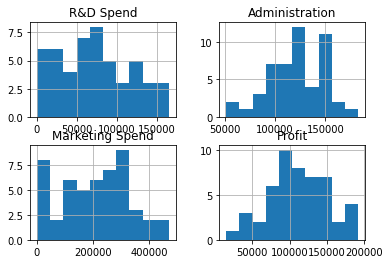

                 R&D Spend  Administration  Marketing Spend    Profit
R&D Spend         1.000000        0.241955         0.724248  0.972900
Administration    0.241955        1.000000        -0.032154  0.200717
Marketing Spend   0.724248       -0.032154         1.000000  0.747766
Profit            0.972900        0.200717         0.747766  1.000000


In [1]:

import pandas as pd
url='/50_Startups.csv'
data=pd.read_csv(url)
data.head()

import matplotlib.pyplot as plt
data.hist()
plt.show()

correlation=data.corr()
print(correlation)

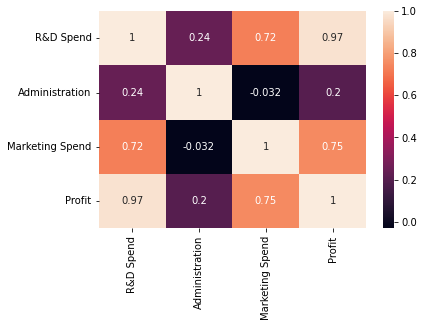

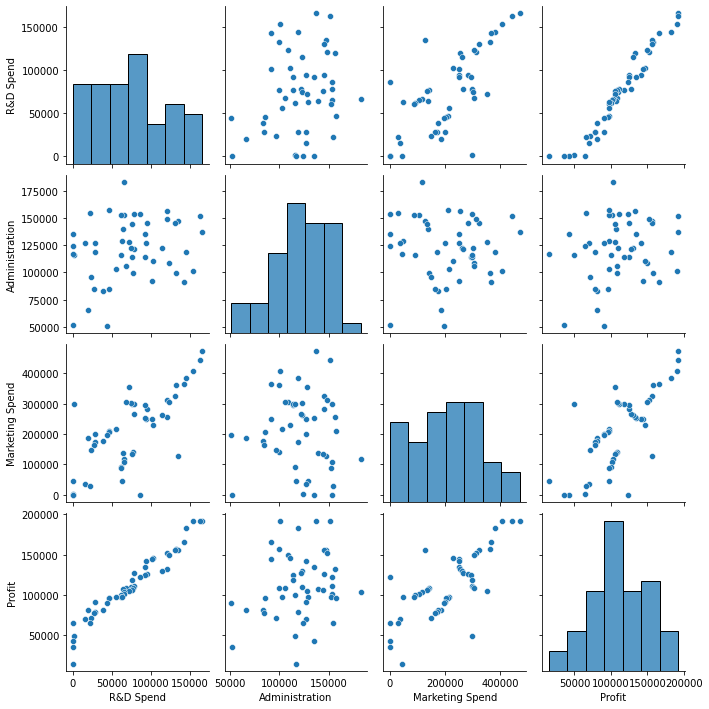

In [2]:
import seaborn as sns
sns.heatmap(correlation,annot=True)

sns.pairplot(data)

In [6]:
from sklearn import linear_model
model=linear_model.LinearRegression()

model.fit(X=data.loc[:,['R&D Spend','Administration','Marketing Spend']],y=data['Profit'])
print('intercept la: ',model.intercept_)
print('coeffient la: ',model.coef_)
print('do chinh xac: ',model.score(X=data.loc[:,['R&D Spend','Administration','Marketing Spend']],y=data['Profit']))


model=linear_model.LinearRegression()
X=pd.DataFrame([data['Marketing Spend'],data['Marketing Spend']**2,data['Marketing Spend']**3,data['Marketing Spend']**4]).T 
model.fit(X,y=data['Profit'])
print("Intercept bac 4 cua mo hinh:", model.intercept_)
print("Coeffient bac 4 cua mo hinh:", model.coef_)
print('Do chinh xac bac 4 cua mo hinh:',model.score(X,y=data['Profit']))

intercept la:  50122.19298986524
coeffient la:  [ 0.80571505 -0.02681597  0.02722806]
do chinh xac:  0.9507459940683246
Intercept bac 4 cua mo hinh: 71788.30506031556
Coeffient bac 4 cua mo hinh: [ 1.56308682e-11  1.68530750e-06 -5.61621201e-12  7.10597115e-18]
Do chinh xac bac 4 cua mo hinh: 0.5783577181371081


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


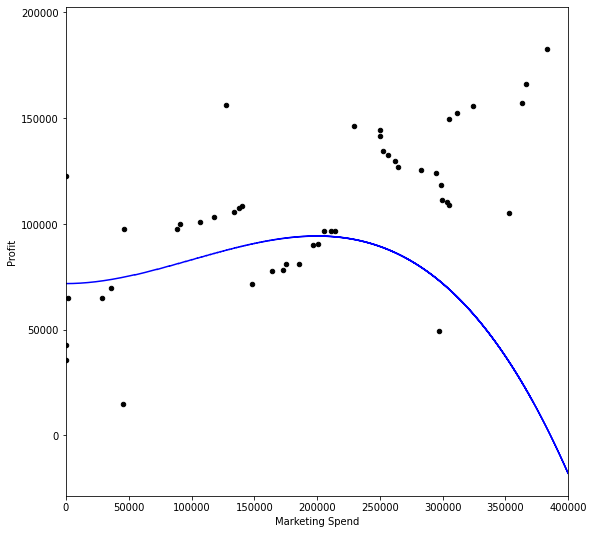

In [8]:
import numpy as np
range= np.arange(0,400000,1)
X_range=pd.DataFrame([range,range**2,range**3,range**4,]).T 
y_pred=model.predict(X=X_range)
data.plot(kind='scatter',x='Marketing Spend',
          y='Profit',figsize=(9,9),color='black',
          xlim=(0,400000))
plt.plot(range,y_pred,color='blue')